In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']  # Add more tickers if needed
start_date = '2020-01-01'
end_date = '2021-12-31'

In [ ]:
#Step 1: Download asset data
def download_asset_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data
asset_data = download_asset_data(tickers, start_date, end_date)

[*********************100%***********************]  5 of 5 completed


In [ ]:
# Step 2: Calculate returns
def calculate_returns(data):
    returns = data.pct_change().dropna()
    return returns

returns = calculate_returns(asset_data)

In [ ]:
# Step 3: Calculate expected returns and standard deviations
def calculate_expected_returns(returns):
    expected_returns = returns.mean() * 252  # Assuming 252 trading days in a year
    return expected_returns

expected_returns = calculate_expected_returns(returns)
cov_matrix = returns.cov()

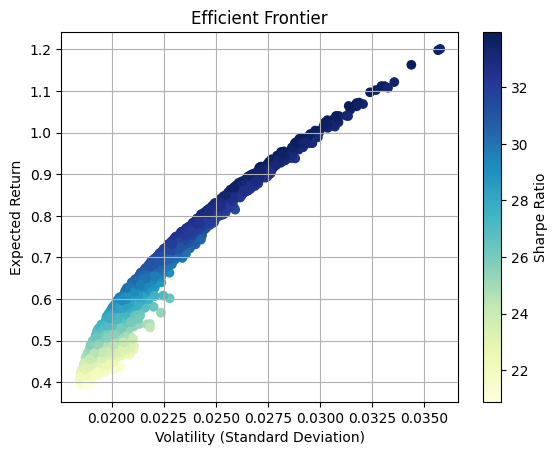

In [ ]:
# Step 4: Plot the efficient frontier
def plot_efficient_frontier(expected_returns, cov_matrix, num_portfolios):
    results = np.zeros((3, num_portfolios))
    risk_free_rate = 0  # You can adjust the risk-free rate if needed

    for i in range(num_portfolios):
        weights = np.random.random(len(expected_returns))
        weights /= np.sum(weights)
        portfolio_return = np.sum(expected_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = portfolio_sharpe_ratio

    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.grid(True)
    plt.show()


num_portfolios = 5000  # You can adjust the number of portfolios
plot_efficient_frontier(expected_returns, cov_matrix, num_portfolios)